### Introduction to Machine Learning with Python
## Chapter 2. 지도학습
---
# 비선형 회귀

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

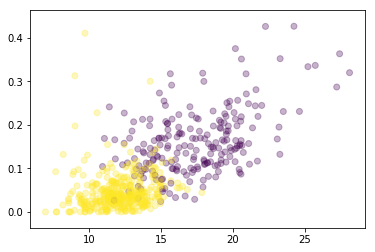

In [4]:
col1 = 0
col2 = 6

plt.scatter(cancer.data[:,col1], cancer.data[:,col2], c= cancer.target, alpha=0.3)

### 선형회귀

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(cancer.data[:,[col1]], cancer.data[:,col2])

model.coef_, model.intercept_

(array([0.01530951]), -0.1274825984768875)

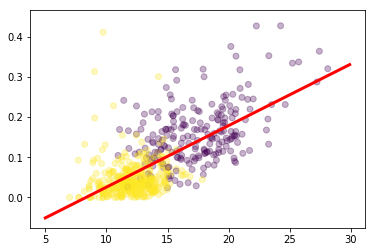

In [6]:
xs = np.arange(5,30,0.1)
ys = xs*model.coef_[0] + model.intercept_

plt.scatter(cancer.data[:,col1], cancer.data[:,col2], c= cancer.target, alpha=0.3)
plt.plot(xs,ys,'r-',lw=3)

### 2차식 회귀

In [11]:
X = np.c_[cancer.data[:,col1], (cancer.data[:,col1])**2]
y = cancer.data[:,col2]

model = LinearRegression()
model.fit(X, y)

model.coef_, model.intercept_

(array([-0.00546943,  0.00065831]), 0.026519913885121926)

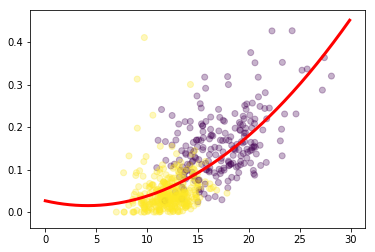

In [14]:
xs = np.arange(0,30,0.1)
ys = xs*model.coef_[0] + (xs**2)*model.coef_[1] + model.intercept_

plt.scatter(cancer.data[:,col1], cancer.data[:,col2], c= cancer.target, alpha=0.3)
plt.plot(xs,ys,'r-',lw=3)

### 3차식 회귀

In [6]:
X = np.c_[cancer.data[:,col1], (cancer.data[:,col1])**2, (cancer.data[:,col1])**3]
y = cancer.data[:,col2]

model = LinearRegression()
model.fit(X, y)

model.coef_, model.intercept_

(array([-5.53456968e-02,  3.81149612e-03, -6.31326376e-05]),
 0.27649793237737497)

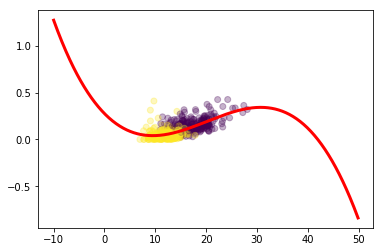

In [8]:
xs = np.arange(-10,50,0.1)
ys = xs*model.coef_[0] + (xs**2)*model.coef_[1] + (xs**3)*model.coef_[2] + model.intercept_

plt.scatter(cancer.data[:,col1], cancer.data[:,col2], c= cancer.target, alpha=0.3)
plt.plot(xs,ys,'r-',lw=3)

### 지수함수 회귀 (Exponential Regression)
> $$ y = exp(ax + b) $$
> $$ log(y) = ax + b $$

In [17]:
X = cancer.data[:,[col1]]
y = np.log(cancer.data[:,col2]+0.01) # 값이 0인 데이터가 있어 0.01 을 더해줌

model = LinearRegression()
model.fit(X, y)

model.coef_, model.intercept_

(array([0.1579534]), -4.875933569557782)

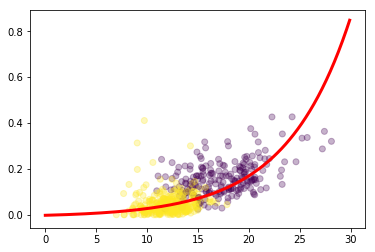

In [18]:
xs = np.arange(0,30,0.1)
ys = np.exp(xs*model.coef_[0] + model.intercept_) - 0.01

plt.scatter(cancer.data[:,col1], cancer.data[:,col2], c= cancer.target, alpha=0.3)
plt.plot(xs,ys,'r-',lw=3)

### 멱함수 회귀 (Power Law Regression)
> $$ y = a \cdot x^n $$
> $$ log(y) = n \cdot log(x) + log(a) $$

In [20]:
X = np.log(cancer.data[:,[col1]])
y = np.log(cancer.data[:,col2]+0.01) # 값이 0인 데이터가 있어 0.01 을 더해줌

model = LinearRegression()
model.fit(X, y)

model.coef_, model.intercept_

(array([2.321263]), -8.724171466884766)

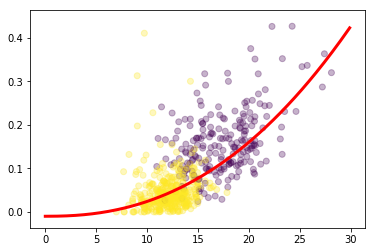

In [21]:
xs = np.arange(0,30,0.1)
ys = np.exp(model.intercept_) * (xs**model.coef_[0]) - 0.01

plt.scatter(cancer.data[:,col1], cancer.data[:,col2], c= cancer.target, alpha=0.3)
plt.plot(xs,ys,'r-',lw=3)

### 멱함수와 복잡계

- 샘플을 만들어 적용해 보자 (n = -3/4 인 경우)
- 지진강도 대비 어떤 지역의 지진이 일어나는 횟수로 생각해 보자

In [10]:
xs = np.random.uniform(0.1, 2, size=100)
ys = 10 * (xs**(-3/4)) + np.random.normal(0, 0.5, size=len(xs)) # n=-3/4, a = 10

Text(0,0.5,'Count')

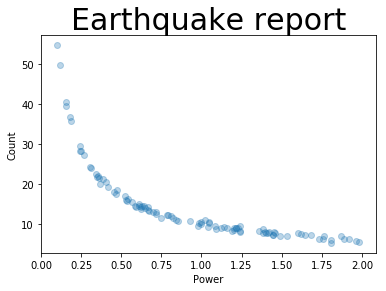

In [11]:
plt.scatter(xs, ys, alpha=0.3)
plt.title('Earthquake report', fontsize=30)
plt.xlabel('Power')
plt.ylabel('Count')

(-2.4304567152063568,
 0.8418633354476694,
 1.5257218394123955,
 4.134815453302616)

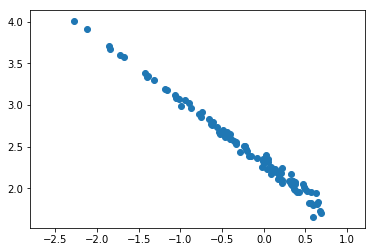

In [13]:
plt.scatter(np.log(xs), np.log(ys))
plt.axis('equal')

In [14]:
X = np.log(xs).reshape(-1,1)
y = np.log(ys)

model = LinearRegression()
model.fit(X, y)

model.coef_, model.intercept_ # n = model.coef_[0], a = exp(model.intercept_)

(array([-0.75247268]), 2.3058752643130114)

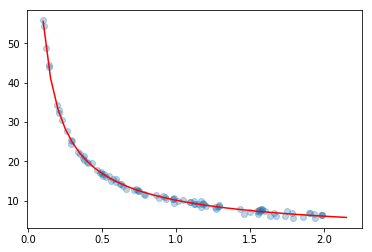

In [68]:
input_x = np.arange(0.1,2.2,0.05)
pred_y = np.exp(model.intercept_) * (input_x**model.coef_[0])

plt.scatter(xs, ys, alpha=0.3)
plt.plot(input_x,pred_y,'r-')